<a href="https://colab.research.google.com/github/manvi-smaran/Handwritten_Digit_Classifier/blob/main/Handwritten_Digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up PyTorch

In [2]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from torchvision.transforms.v2 import ToTensor
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Loading and Transforming the Dataset

In [4]:
train_data=datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()

)
test_data=datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

/usr/local/lib/python3.11/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(
100%|██████████| 9.91M/9.91M [00:00<00:00, 97.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 23.2MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 78.7MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.60MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [4]:
image , label =train_data[0]
print(image.shape)
print(label)

torch.Size([1, 28, 28])
5


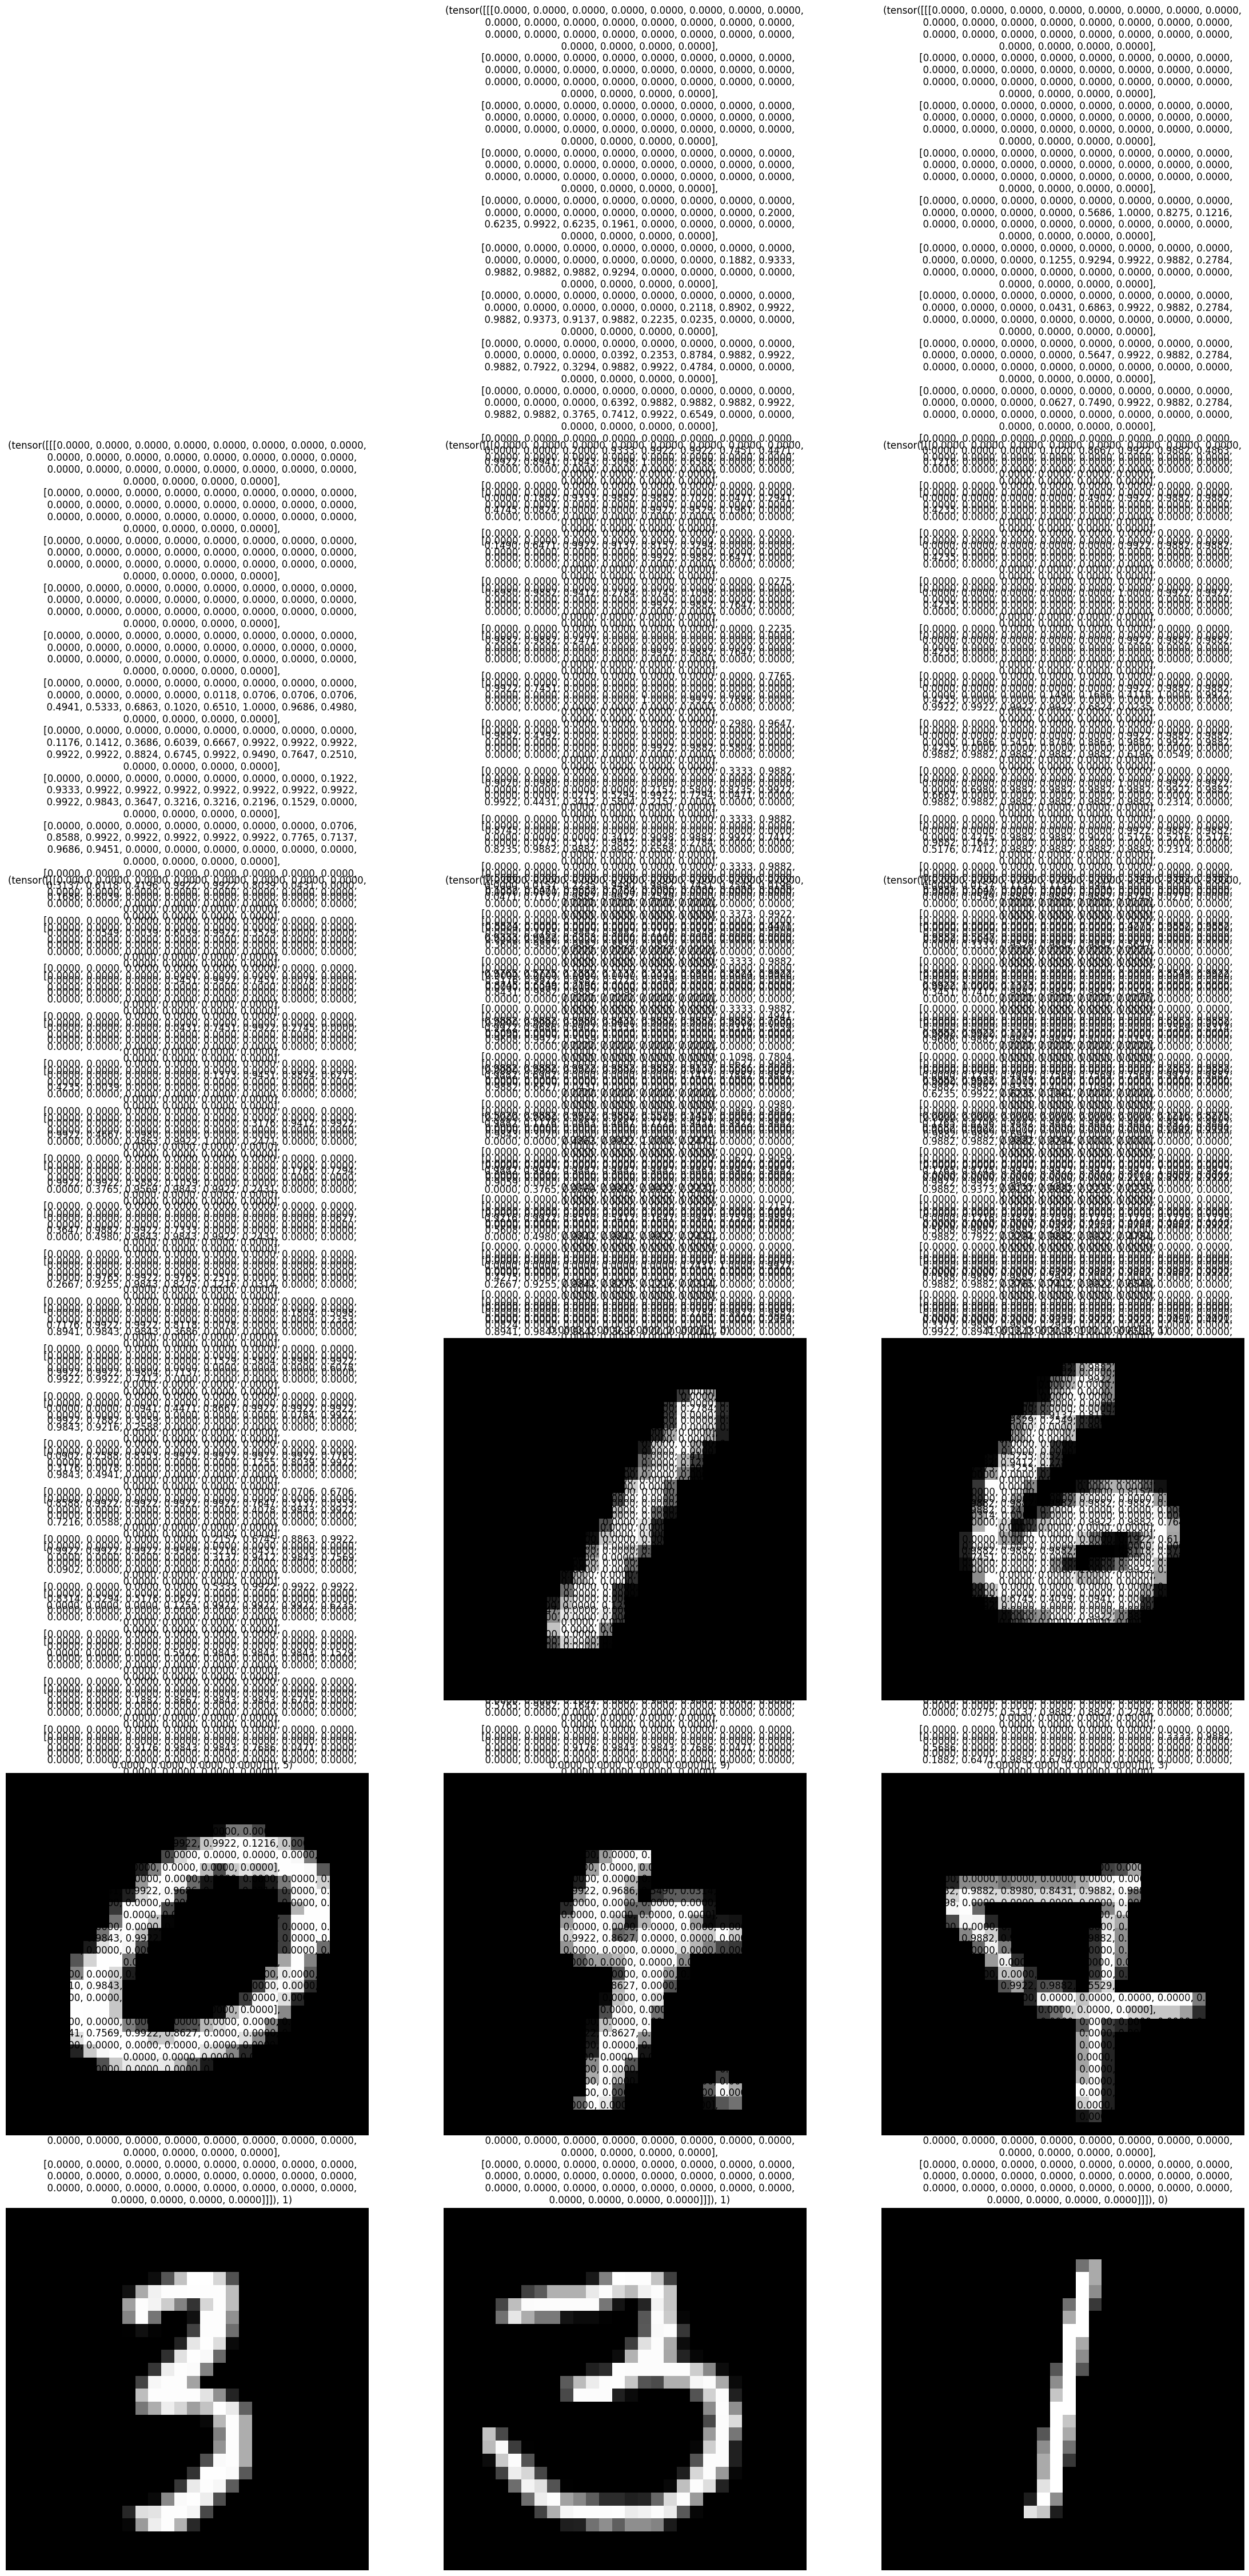

In [5]:
figure=plt.figure(figsize=(28,28))
cols, rows = 3, 3
for i in range(2, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(train_data[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [6]:
train_data.data.shape


torch.Size([60000, 28, 28])

In [7]:
test_data.data.shape


torch.Size([10000, 28, 28])

In [8]:
train_data.targets.shape


torch.Size([60000])

In [9]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

# Initializing the Model

In [5]:
train_dataloader=DataLoader(train_data,batch_size=100,shuffle=True)

test_dataloader=DataLoader(test_data,batch_size=1000,shuffle=True)


In [11]:
# Defining Model
# nn.ReLU & nn.Tanh()
model = nn.Sequential(
      nn.Flatten(),
      nn.Linear(28*28,128),
      nn.Tanh(),
      nn.Linear(128,10)
      ).to(device)

In [12]:
# Defining Optimizer
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Adam
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9) # SGD

In [13]:
loss_func=nn.CrossEntropyLoss() # Defining Loss Function

In [14]:
epochs = 10 # Defining epochs (5, 10, 20)
for batch_x, batch_y in train_dataloader:
  print(batch_x.shape)
  print(batch_y.shape)
  break

torch.Size([100, 1, 28, 28])
torch.Size([100])


# Training the Model

In [15]:
for epoch in range(epochs):
  model.train() #setting the train mode
  total_loss=0
  for batch_x,batch_y in train_dataloader:
    y_pred=model(batch_x) #forward pass
    loss=loss_func(y_pred,batch_y)#calclating the loss
    optimizer.zero_grad()
    loss.backward()#backpropagation on loss w.r.t parameter of the model
    optimizer.step()
    total_loss += loss.item()
  print(f"Epoch {epoch+1}, Avg Loss: {total_loss / len(train_dataloader):.4f}")

Epoch 1, Avg Loss: 0.5359
Epoch 2, Avg Loss: 0.2903
Epoch 3, Avg Loss: 0.2471


KeyboardInterrupt: 

# Testing the Model

In [ ]:
model.eval()  # Set model to evaluation mode

correct = 0
total = 0
test_loss = 0

with torch.inference_mode():  # or use torch.no_grad()
    for batch_x, batch_y in test_dataloader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)

        y_pred_new = model(batch_x)                # forward pass
        test_loss += loss_func(y_pred_new, batch_y)  # accumulate loss

        predicted = torch.argmax(y_pred_new, dim=1)  # get predicted class
        correct += (predicted == batch_y).sum()
        total += batch_y.size(0)

avg_loss = test_loss / len(test_dataloader)
accuracy = correct / total * 100

print(f"Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%")


# Observation Table
| **Config** | **Epochs** |              **Layers**             |              **Neurons**             | **Activation** | **Optimizer** | **Test Accuracy (%)** |
|:----------:|:----------:|:-----------------------------------:|:------------------------------------:|:--------------:|:-------------:|:---------------------:|
|     #1     |      5     |           1 (Output Layer)          |                  128                 |      relu      |      adam     |         97.33         |
|     #2     |      5     |  2 (1 Output Layer; 1 Hidden Layer) |      256 (L1 -> 256; L2 -> 128)      |      relu      |      adam     |         97.84         |
|     #3     |      5     | 3 (1 Output Layer; 2 Hidden Layers) | 256 (L1 -> 256; L2 -> 128; L3 -> 64) |      relu      |      adam     |         97.60         |
|     #4     |      5     |           1 (Output Layer)          |                  128                 |      tanh      |      sgd      |         95.10         |
|     #5     |      5     |  2 (1 Output Layer; 1 Hidden Layer) |      256 (L1 -> 256; L2 -> 128)      |      tanh      |      sgd      |         95.51         |
|     #6     |      5     | 3 (1 Output Layer; 2 Hidden Layers) | 256 (L1 -> 256; L2 -> 128; L3 -> 64) |      tanh      |      sgd      |         95.79         |
|     #7     |     10     |           1 (Output Layer)          |                  128                 |      relu      |      adam     |         97.32         |
|     #8     |     10     |  2 (1 Output Layer; 1 Hidden Layer) |      256 (L1 -> 256; L2 -> 128)      |      relu      |      adam     |         97.92         |
|     #9     |     10     | 3 (1 Output Layer; 2 Hidden Layers) | 256 (L1 -> 256; L2 -> 128; L3 -> 64) |      relu      |      adam     |         97.98         |
|     #10    |     10     |           1 (Output Layer)          |                  128                 |      tanh      |      sgd      |         96.63         |
|     #11    |     10     |  2 (1 Output Layer; 1 Hidden Layer) |      256 (L1 -> 256; L2 -> 128)      |      tanh      |      sgd      |         96.94         |
|     #12    |     10     | 3 (1 Output Layer; 2 Hidden Layers) | 256 (L1 -> 256; L2 -> 128; L3 -> 64) |      tanh      |      sgd      |         97.34         |
|     #13    |     20     |           1 (Output Layer)          |                  128                 |      relu      |      adam     |         97.95         |
|     #14    |     20     |  2 (1 Output Layer; 1 Hidden Layer) |      256 (L1 -> 256; L2 -> 128)      |      relu      |      adam     |         98.11         |
|     #15    |     20     | 3 (1 Output Layer; 2 Hidden Layers) | 256 (L1 -> 256; L2 -> 128; L3 -> 64) |      relu      |      adam     |         98.00         |
|     #16    |     20     |           1 (Output Layer)          |                  128                 |      tanh      |      sgd      |         97.74         |
|     #17    |     20     |  2 (1 Output Layer; 1 Hidden Layer) |      256 (L1 -> 256; L2 -> 128)      |      tanh      |      sgd      |         98.03         |
|     #18    |     20     | 3 (1 Output Layer; 2 Hidden Layers) | 256 (L1 -> 256; L2 -> 128; L3 -> 64) |      tanh      |      sgd      |         97.99         |

# Hyperparameter Tuning

Model Builder Function

In [6]:
def build_model(hidden_layers, neurons, activation_fn):
    layers = [nn.Flatten()]
    in_features = 28 * 28

    for _ in range(hidden_layers):
        layers.append(nn.Linear(in_features, neurons))
        layers.append(activation_fn())
        in_features = neurons

    layers.append(nn.Linear(in_features, 10))
    return nn.Sequential(*layers)

Evaluation Function

In [7]:
def evaluate(model, test_loader):
    model.eval()
    correct = 0
    with torch.inference_mode():
        for x, y in test_dataloader:
            x, y = x.to(device), y.to(device)
            pred = model(x).argmax(dim=1)
            correct += (pred == y).sum()
    return correct / len(test_dataloader.dataset)

In [8]:
#Hyperparameter Grid
epochs_list = [5, 10, 20]
hidden_layers_list = [1, 2]
neurons_list = [64, 128, 256]
activations = {'ReLU': nn.ReLU, 'Tanh': nn.Tanh}
optimizers = {'Adam': optim.Adam, 'SGD': optim.SGD}
results = []
best_accuracy = 0.0
best_model_state = None

In [9]:
#Loop over combinations
for epochs, hidden_layers, neurons, (act_name, act_fn), (opt_name, opt_cls) in itertools.product(
    epochs_list, hidden_layers_list, neurons_list, activations.items(), optimizers.items()
):
    print(f"Training: Epochs={epochs}, Layers={hidden_layers}, Neurons={neurons}, Activation={act_name}, Optimizer={opt_name}")

    model = build_model(hidden_layers, neurons, act_fn).to(device)
    optimizer = opt_cls(model.parameters())
    loss_fn = nn.CrossEntropyLoss()

    # Training loop
    for epoch in range(epochs):
        model.train()
        for x, y in train_dataloader:
            x, y = x.to(device), y.to(device)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluation
    accuracy = evaluate(model, test_dataloader)
    results.append({
        'epochs': epochs,
        'hidden_layers': hidden_layers,
        'neurons': neurons,
        'activation': act_name,
        'optimizer': opt_name,
        'test_accuracy': accuracy
    })

    # Save best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_state = model.state_dict()

Training: Epochs=5, Layers=1, Neurons=64, Activation=ReLU, Optimizer=Adam
Training: Epochs=5, Layers=1, Neurons=64, Activation=ReLU, Optimizer=SGD
Training: Epochs=5, Layers=1, Neurons=64, Activation=Tanh, Optimizer=Adam
Training: Epochs=5, Layers=1, Neurons=64, Activation=Tanh, Optimizer=SGD
Training: Epochs=5, Layers=1, Neurons=128, Activation=ReLU, Optimizer=Adam
Training: Epochs=5, Layers=1, Neurons=128, Activation=ReLU, Optimizer=SGD
Training: Epochs=5, Layers=1, Neurons=128, Activation=Tanh, Optimizer=Adam
Training: Epochs=5, Layers=1, Neurons=128, Activation=Tanh, Optimizer=SGD
Training: Epochs=5, Layers=1, Neurons=256, Activation=ReLU, Optimizer=Adam
Training: Epochs=5, Layers=1, Neurons=256, Activation=ReLU, Optimizer=SGD
Training: Epochs=5, Layers=1, Neurons=256, Activation=Tanh, Optimizer=Adam
Training: Epochs=5, Layers=1, Neurons=256, Activation=Tanh, Optimizer=SGD
Training: Epochs=5, Layers=2, Neurons=64, Activation=ReLU, Optimizer=Adam
Training: Epochs=5, Layers=2, Neuron

## Save results


In [28]:
df = pd.DataFrame(results)
df.to_csv("hyperparameter_results.csv", index=False)
torch.save(best_model_state, "best_model_state.pth")

print("Hyperparameter search complete.")
print(f"Best test accuracy: {best_accuracy:.4f}")

Hyperparameter search complete.
Best test accuracy: 0.9797


# Analysis & Visualization

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("hyperparameter_results.csv")

# Clean and convert 'test_accuracy'
df['test_accuracy'] = df['test_accuracy'].astype(str).str.extract(r'tensor\((.*?)\)').astype(float)
df.dropna(subset=['test_accuracy'], inplace=True)

In [37]:
#Sort by accuracy to find best
top_5 = df.sort_values(by="test_accuracy", ascending=False).head(5)
print("Top 5 Models by Test Accuracy:")
print(top_5)

sns.set(style="whitegrid")

Top 5 Models by Test Accuracy:
    epochs  hidden_layers  neurons activation optimizer  test_accuracy
68      20              2      256       ReLU      Adam         0.9797
20       5              2      256       ReLU      Adam         0.9796
56      20              1      256       ReLU      Adam         0.9793
52      20              1      128       ReLU      Adam         0.9793
28      10              1      128       ReLU      Adam         0.9792


Accuracy vs Epochs


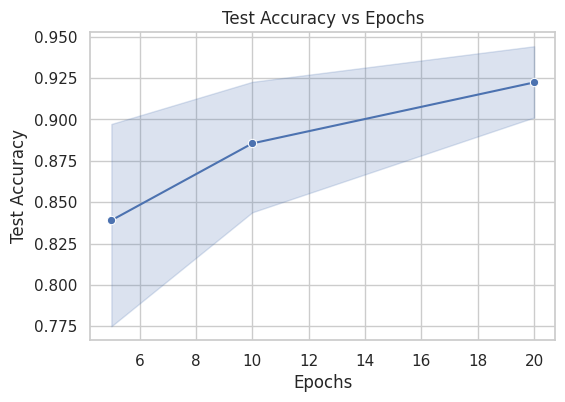

In [38]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=df, x="epochs", y="test_accuracy", marker='o')
plt.title("Test Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Test Accuracy")
plt.savefig("accuracy_vs_epochs.png")
plt.show()

Activation Function Comparison

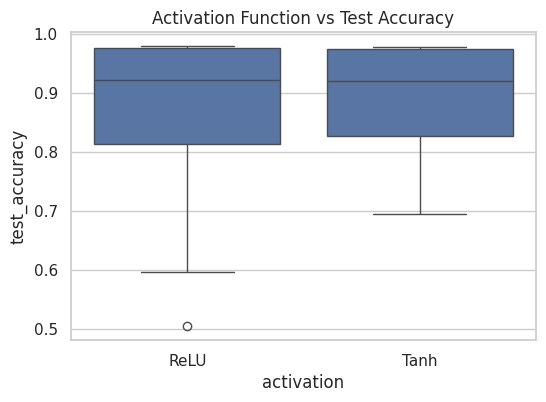

In [39]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="activation", y="test_accuracy")
plt.title("Activation Function vs Test Accuracy")
plt.savefig("activation_comparison.png")
plt.show()

Optimizer Comparison

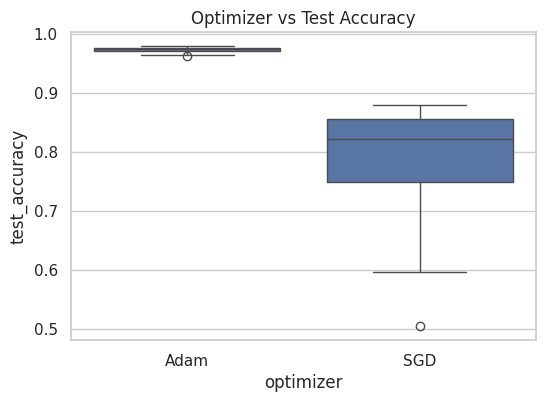

In [40]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="optimizer", y="test_accuracy")
plt.title("Optimizer vs Test Accuracy")
plt.savefig("optimizer_comparison.png")
plt.show()

Heatmap of Neurons vs Accuracy (for each hidden layer count)

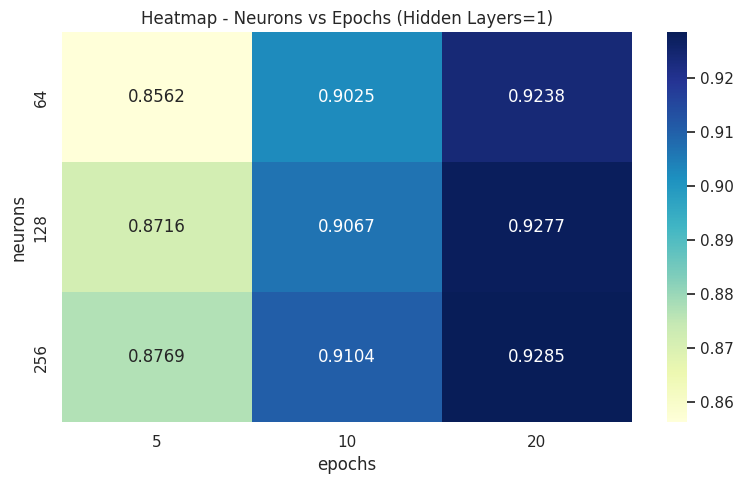

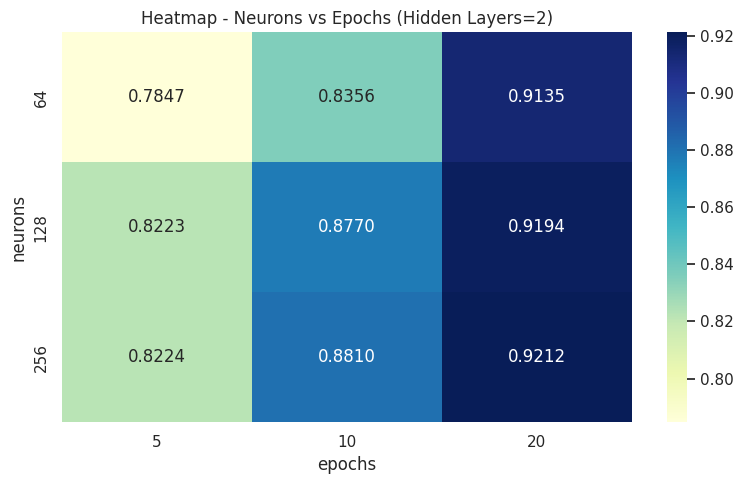

In [41]:
# Plotting heatmaps
for layers in df['hidden_layers'].unique():
    subset = df[df['hidden_layers'] == layers].pivot_table(
        index="neurons", columns="epochs", values="test_accuracy", aggfunc='mean'
    )
    if subset.empty:
        print(f"Skipping empty subset for hidden_layers={layers}")
        continue

    plt.figure(figsize=(8, 5))
    sns.heatmap(subset, annot=True, fmt=".4f", cmap="YlGnBu")
    plt.title(f"Heatmap - Neurons vs Epochs (Hidden Layers={layers})")
    plt.tight_layout()
    plt.show()